170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


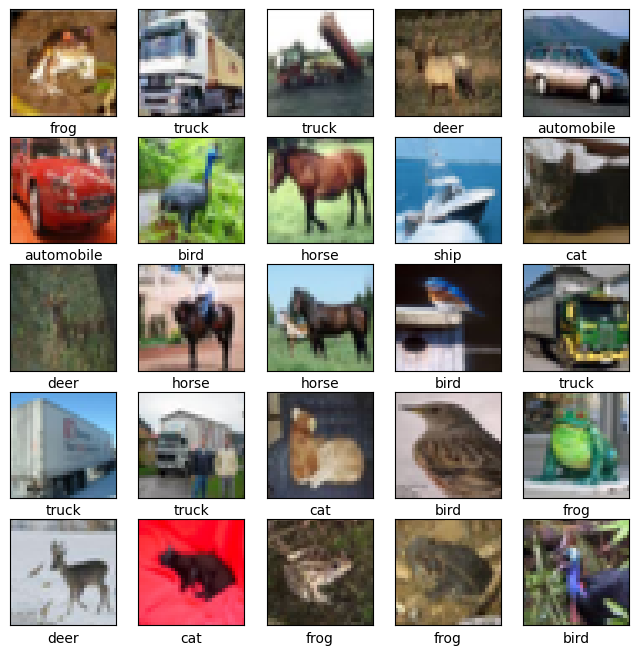

Class counts: Counter({np.uint8(6): 6000, np.uint8(9): 6000, np.uint8(4): 6000, np.uint8(1): 6000, np.uint8(2): 6000, np.uint8(7): 6000, np.uint8(8): 6000, np.uint8(3): 6000, np.uint8(5): 6000, np.uint8(0): 6000})
The CIFAR-10 dataset is balanced.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.2787 - loss: 1.9337 - val_accuracy: 0.5007 - val_loss: 1.4026 - learning_rate: 0.0010
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4906 - loss: 1.4121 - val_accuracy: 0.5561 - val_loss: 1.2223 - learning_rate: 0.0010
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5547 - loss: 1.2468 - val_accuracy: 0.6080 - val_loss: 1.1089 - learning_rate: 0.0010
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6025 - loss: 1.1217 - val_accuracy: 0.6475 - val_loss: 0.9989 - learning_rate: 0.0010
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6329 - loss: 1.0391 - val_accuracy: 0.6740 - val_loss: 0.9199 - learning_rate: 0.0010
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6626 - loss: 0.9615 - val_accuracy: 0.6897 - val_loss: 0.8861 - learning_rate: 9.0484e-04
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6777 - los

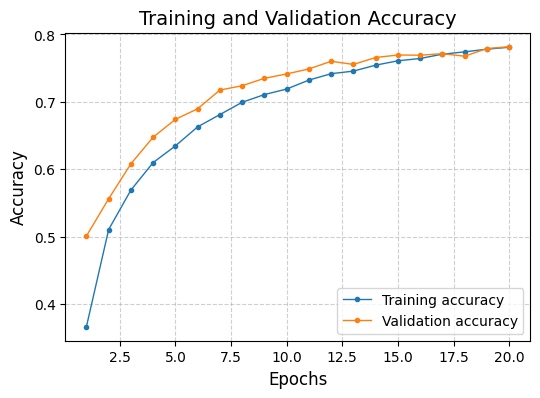

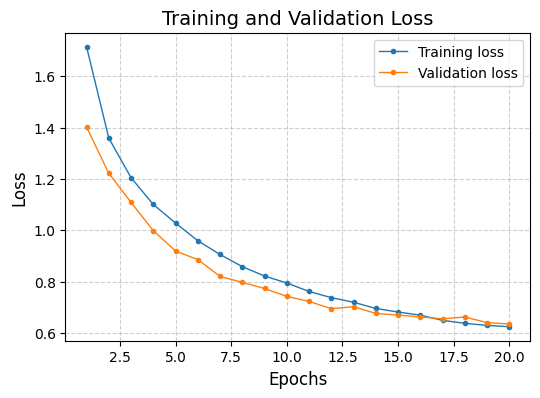

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


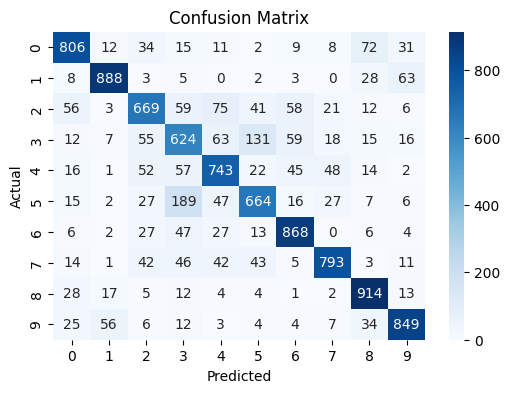

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


all_labels = tf.concat([y_train, y_test], axis=0).numpy().flatten()
class_counts = Counter(all_labels)
is_balanced = len(set(class_counts.values())) == 1
print("Class counts:", class_counts)
if is_balanced:
    print("The CIFAR-10 dataset is balanced.")
else:
    print("The CIFAR-10 dataset is NOT balanced.")


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)



x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time


datagenerator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.5,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagenerator.fit(x_train)

CNN = models.Sequential()
CNN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
CNN.add(layers.Dropout(0.3))

CNN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
CNN.add(layers.Dropout(0.3))

CNN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
CNN.add(layers.Dropout(0.3))

CNN.add(layers.Flatten())
CNN.add(layers.Dense(1024, activation='relu'))
CNN.add(layers.Dropout(0.5))

CNN.add(layers.Dense(10, activation='softmax'))



CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

def learning_rate_scheduler(epoch, lr):
    if epoch < 5:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))
lr_scheduler = LearningRateScheduler(learning_rate_scheduler)


start_time = time.time()

history = CNN.fit(x_train, y_train, epochs=20, batch_size=128,
                    validation_data=(x_test, y_test), callbacks=lr_scheduler)
end_time = time.time()



test_loss, test_acc = CNN.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")
import matplotlib.pyplot as plt

def plot_learning_curve(history, metric='accuracy'):

    train_metric = history.history[metric]
    val_metric = history.history[f'val_{metric}']
    epochs = range(1, len(train_metric) + 1)


    plt.figure(figsize=(6, 4))
    plt.plot(epochs, train_metric, linestyle='-', marker='.', linewidth=1, label=f'Training {metric}')
    plt.plot(epochs, val_metric, linestyle='-', marker='.', linewidth=1, label=f'Validation {metric}')
    plt.title(f'Training and Validation {metric.title()}', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel(metric.title(), fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


plot_learning_curve(history, metric='accuracy')
plot_learning_curve(history, metric='loss')
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_probs = CNN.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

